Red Level Analysis:
--------------------------------------------------
3 days 99% confidence interval: [-0.0092, 0.0152]
27 days 99% confidence interval: [-0.0097, 0.0637]

Actual log return over 30 days: 0.0583


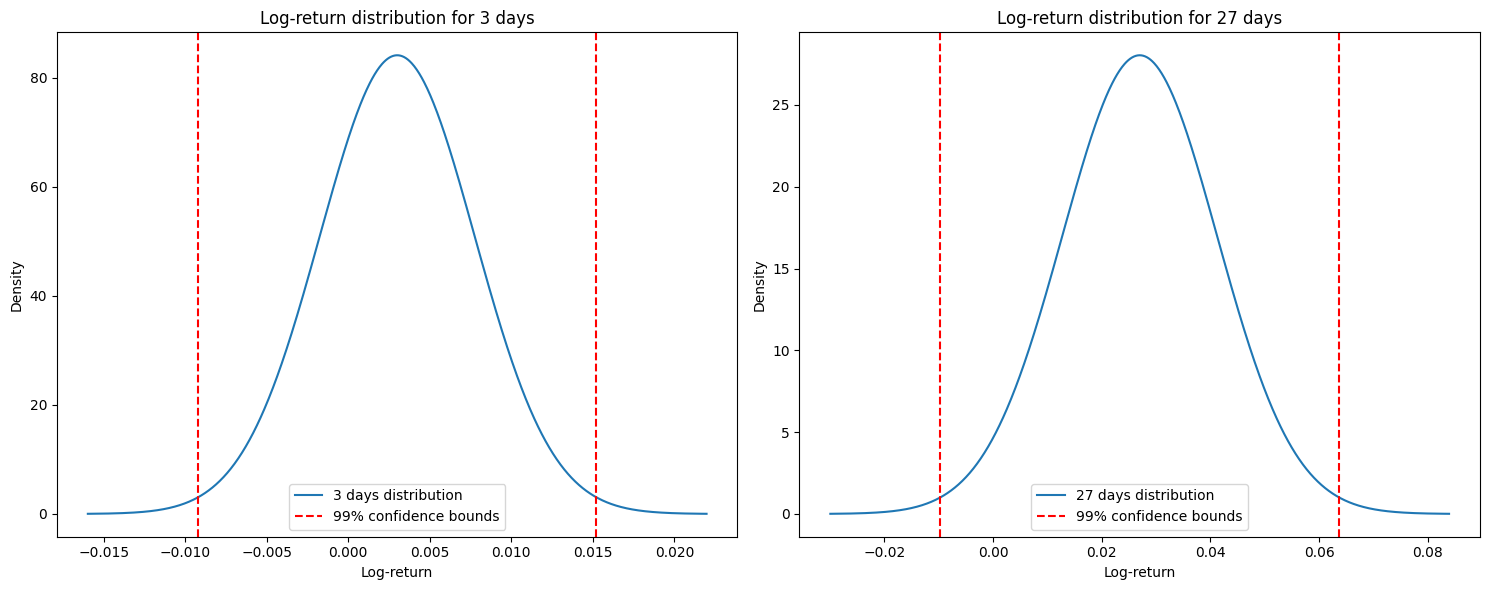


30 days 99% confidence interval: [-0.0086, 0.0686]
360 days 99% confidence interval: [0.2262, 0.4938]


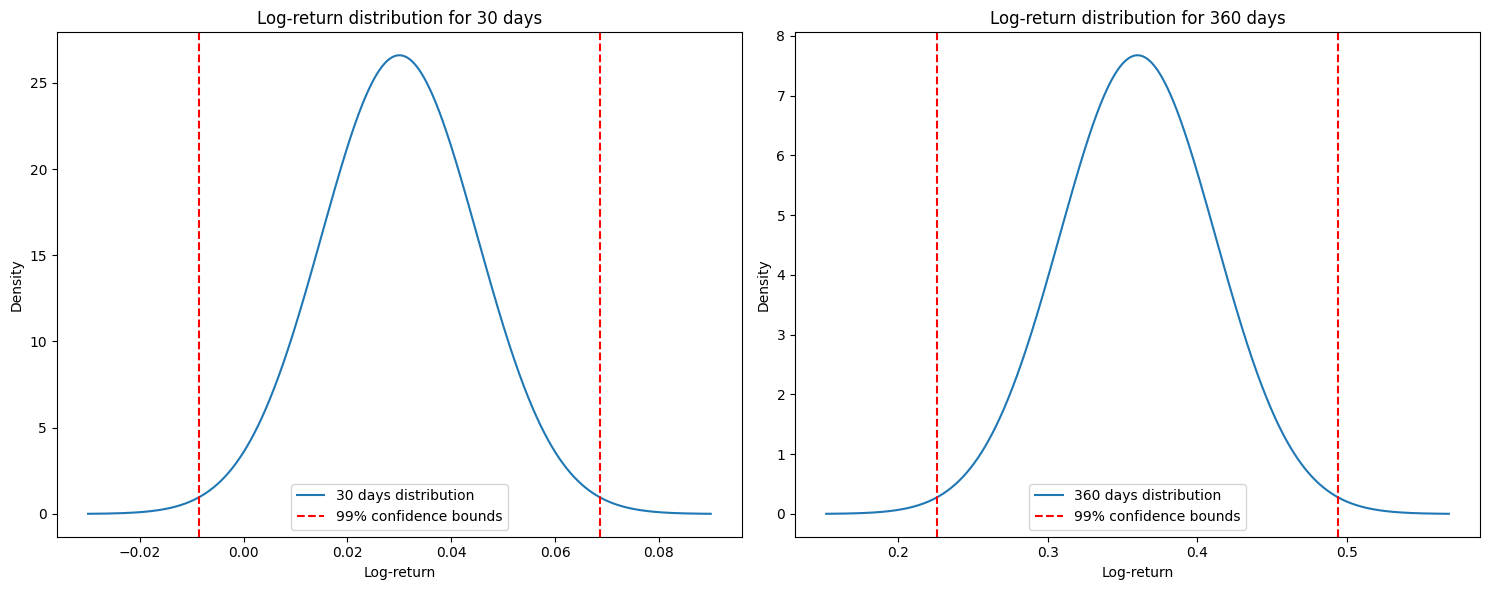


Black Level Analysis:
--------------------------------------------------


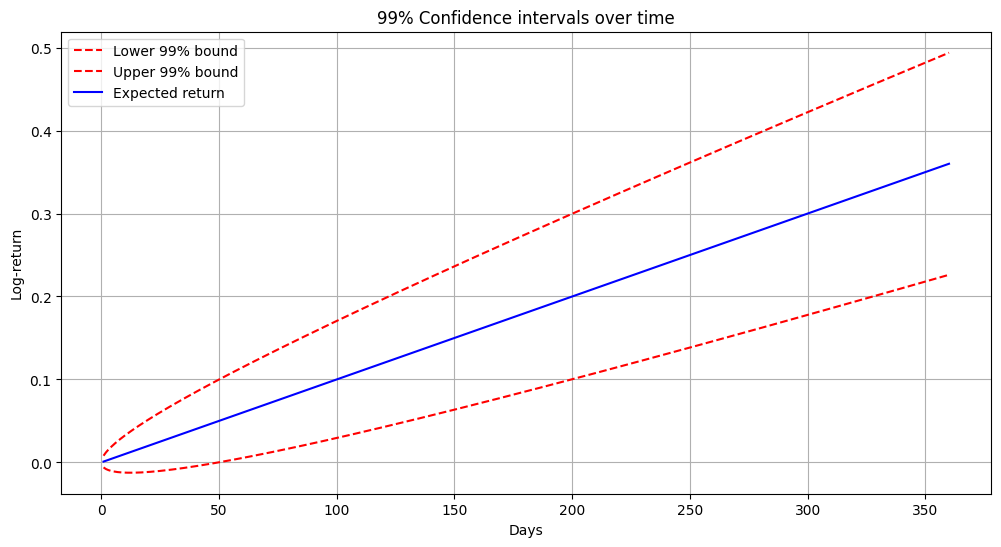


Probability of exceeding daily bounds in 360 days: 0.9734
Probability of exceeding cumulative bounds in 360 days: 0.1420


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
MEAN_MONTHLY = 0.03  # 3% expected monthly return
STD_MONTHLY = 0.015  # 1.5% standard deviation
DAYS_IN_MONTH = 30

# Convert monthly parameters to daily
MEAN_DAILY = MEAN_MONTHLY / DAYS_IN_MONTH
STD_DAILY = STD_MONTHLY / np.sqrt(DAYS_IN_MONTH)

def calculate_confidence_interval(days, confidence=0.99):
    """Calculate confidence interval for given number of days."""
    mean = MEAN_DAILY * days
    std = STD_DAILY * np.sqrt(days)
    lower, upper = stats.norm.interval(confidence, mean, std)
    return lower, upper

def plot_return_distribution(days, ax=None):
    """Plot return distribution for given period."""
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 6))
    
    mean = MEAN_DAILY * days
    std = STD_DAILY * np.sqrt(days)
    lower, upper = calculate_confidence_interval(days)
    
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    y = stats.norm.pdf(x, mean, std)
    
    ax.plot(x, y, label=f'{days} days distribution')
    ax.axvline(lower, color='r', linestyle='--', label='99% confidence bounds')
    ax.axvline(upper, color='r', linestyle='--')
    ax.set_title(f'Log-return distribution for {days} days')
    ax.set_xlabel('Log-return')
    ax.set_ylabel('Density')
    ax.legend()
    
    return lower, upper

# Red level analysis
def red_level_analysis():
    # Create subplot for 3 and 27 days
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 3 days analysis
    lower_3, upper_3 = plot_return_distribution(3, ax1)
    print(f"3 days 99% confidence interval: [{lower_3:.4f}, {upper_3:.4f}]")
    
    # 27 days analysis
    lower_27, upper_27 = plot_return_distribution(27, ax2)
    print(f"27 days 99% confidence interval: [{lower_27:.4f}, {upper_27:.4f}]")
    
    # Case analysis
    actual_return = np.log(1060/1000)  # 6% total return
    print(f"\nActual log return over 30 days: {actual_return:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    # 30 and 360 days analysis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    lower_30, upper_30 = plot_return_distribution(30, ax1)
    lower_360, upper_360 = plot_return_distribution(360, ax2)
    
    print(f"\n30 days 99% confidence interval: [{lower_30:.4f}, {upper_30:.4f}]")
    print(f"360 days 99% confidence interval: [{lower_360:.4f}, {upper_360:.4f}]")
    
    plt.tight_layout()
    plt.show()

# Black level analysis
def black_level_analysis():
    # Calculate confidence intervals for different periods
    days = np.arange(1, 361)
    intervals = [calculate_confidence_interval(d) for d in days]
    lower_bounds, upper_bounds = zip(*intervals)
    
    plt.figure(figsize=(12, 6))
    plt.plot(days, lower_bounds, 'r--', label='Lower 99% bound')
    plt.plot(days, upper_bounds, 'r--', label='Upper 99% bound')
    plt.plot(days, MEAN_DAILY * days, 'b-', label='Expected return')
    plt.xlabel('Days')
    plt.ylabel('Log-return')
    plt.title('99% Confidence intervals over time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Monte Carlo simulation for daily returns
    n_simulations = 10000
    n_days = 360
    
    # Generate daily returns
    daily_returns = np.random.normal(MEAN_DAILY, STD_DAILY, 
                                   size=(n_simulations, n_days))
    
    # Calculate probability of exceeding daily bounds
    daily_bounds = calculate_confidence_interval(1)
    exceeded_daily = np.any(
        (daily_returns < daily_bounds[0]) | (daily_returns > daily_bounds[1]), 
        axis=1
    )
    prob_exceed_daily = np.mean(exceeded_daily)
    print(f"\nProbability of exceeding daily bounds in 360 days: {prob_exceed_daily:.4f}")
    
    # Calculate cumulative returns and check against time-varying bounds
    cumulative_returns = np.cumsum(daily_returns, axis=1)
    exceeded_cumulative = np.zeros(n_simulations, dtype=bool)
    
    for day in range(n_days):
        bounds = calculate_confidence_interval(day + 1)
        exceeded_cumulative |= (cumulative_returns[:, day] < bounds[0]) | \
                             (cumulative_returns[:, day] > bounds[1])
    
    prob_exceed_cumulative = np.mean(exceeded_cumulative)
    print(f"Probability of exceeding cumulative bounds in 360 days: {prob_exceed_cumulative:.4f}")

if __name__ == "__main__":
    print("Red Level Analysis:")
    print("-" * 50)
    red_level_analysis()
    
    print("\nBlack Level Analysis:")
    print("-" * 50)
    black_level_analysis()

# Presentation
https://docs.google.com/presentation/d/1GjIEmjIHorTVGOOxgoKIvuBkXWhOcteYjtaCaqcbeu4/edit?usp=sharing